In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the preprocessed data
df = pd.read_csv('../data/processed/iris_preprocessed.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [3]:
# Split the data into features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Specify the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]}


In [6]:
# Instantiate a RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

In [7]:
# Instantiate the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=5)

In [8]:
# Fit it to the data
clf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [9]:
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}
Best score is 0.95


In [10]:
# Predict the labels of the test set
y_pred = clf_cv.predict(X_test)

In [11]:
# Compute and print metrics
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



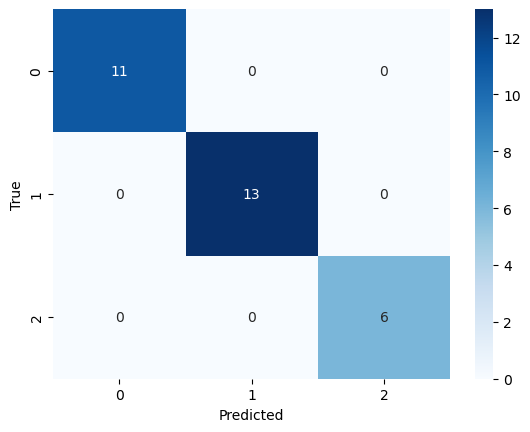

In [12]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

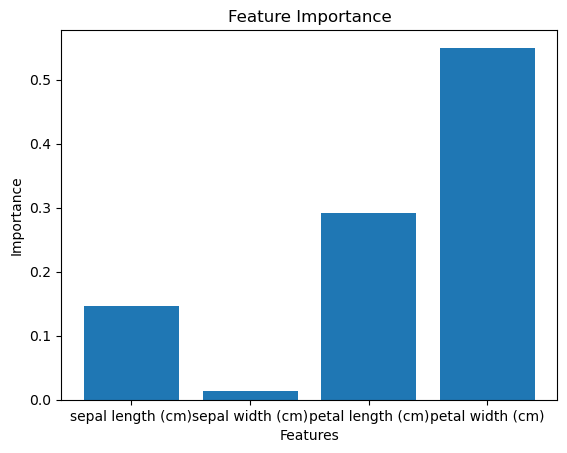

In [13]:
# Feature importance
importances = clf_cv.best_estimator_.feature_importances_
feature_list = list(X.columns)
plt.bar(range(len(importances)), importances, tick_label=feature_list)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()